In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Walmart DataSet.csv')

# Exploratory data analysis

In [3]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#df['Data'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874000  
75%      74.940000     3.735000   212.743293      8.622000  
max     100.140000     4.468000   227.232807     14.313000  
std      18.444933     0.459020    39.356712      1.875885

## Dealing with outliers

In [9]:
col = df.columns
col

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<IPython.core.display.Javascript object>

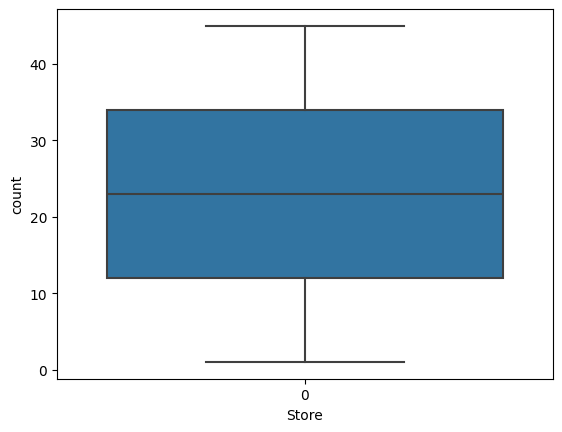

<IPython.core.display.Javascript object>

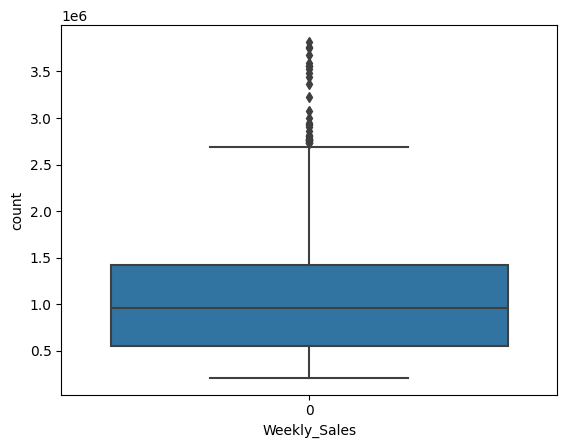

<IPython.core.display.Javascript object>

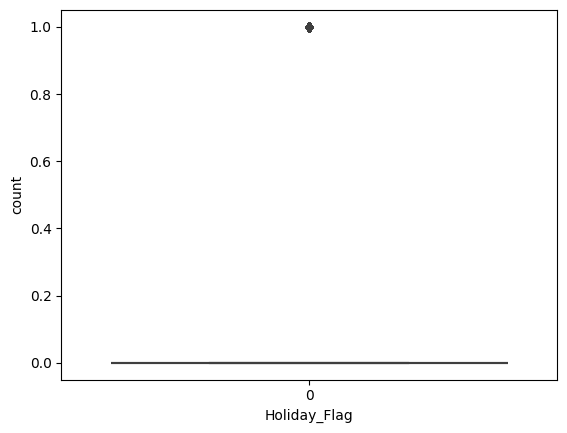

<IPython.core.display.Javascript object>

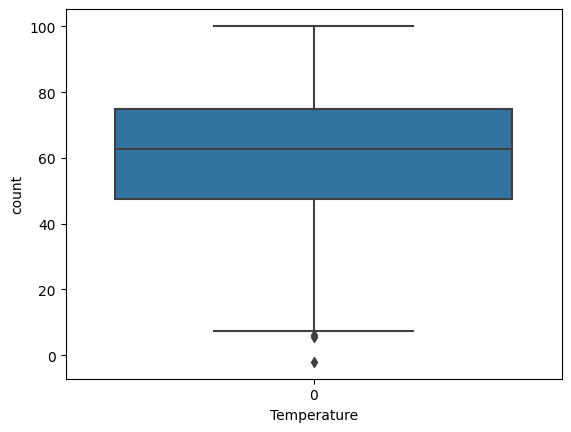

<IPython.core.display.Javascript object>

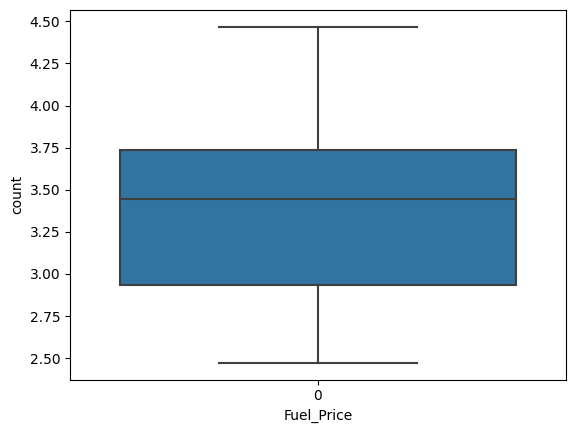

<IPython.core.display.Javascript object>

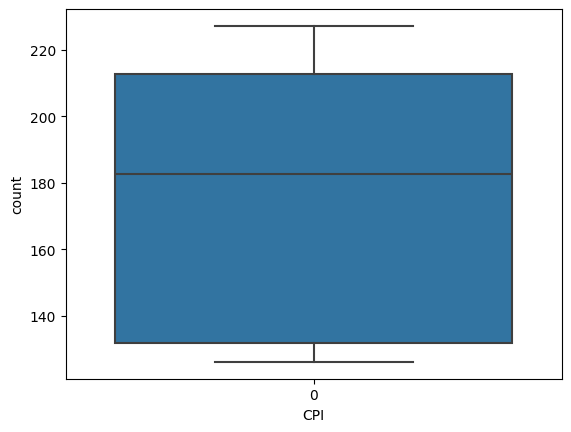

<IPython.core.display.Javascript object>

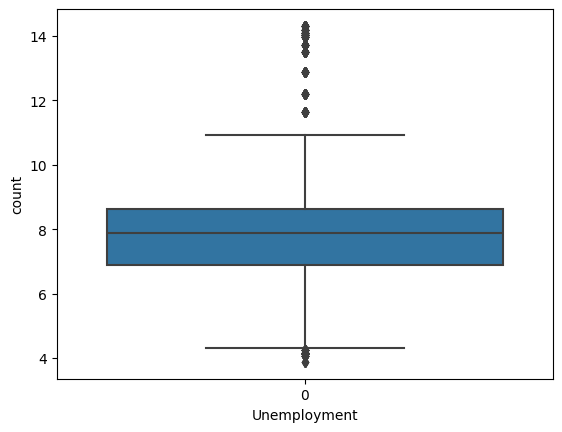

In [10]:
for col_name in col:
  if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()


## Solving outliers from column weekly_sales and unemployment

In [11]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR= Q3 - Q1
df = df[(df['Unemployment'] >= Q1 - 1.5 * IQR) & (df['Unemployment'] <= Q3 + 1.5 * IQR)]

In [12]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR= Q3 - Q1
df = df[(df['Weekly_Sales'] >= Q1 - 1.5 * IQR) & (df['Weekly_Sales'] <= Q3 + 1.5 * IQR)]

<IPython.core.display.Javascript object>

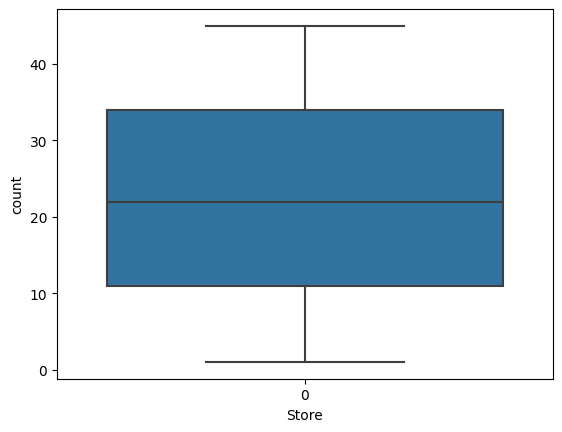

<IPython.core.display.Javascript object>

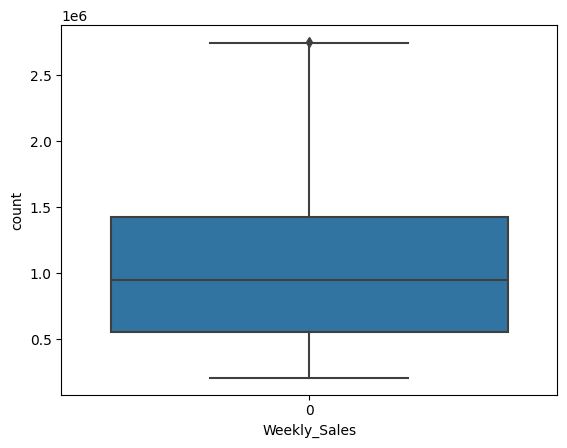

<IPython.core.display.Javascript object>

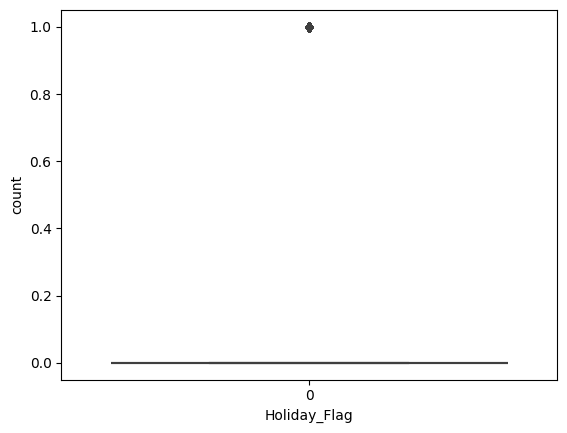

<IPython.core.display.Javascript object>

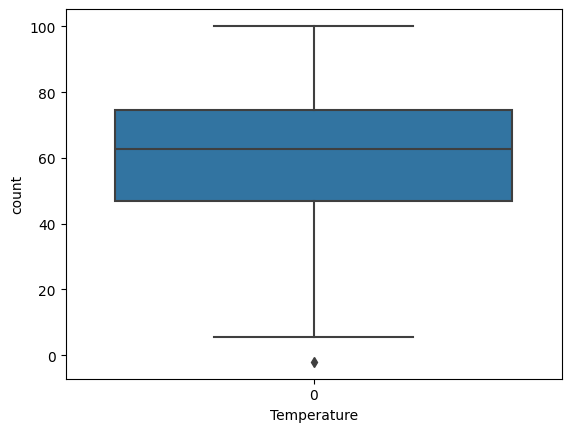

<IPython.core.display.Javascript object>

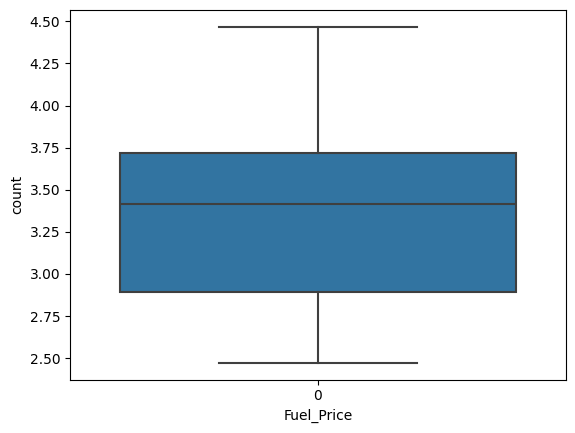

<IPython.core.display.Javascript object>

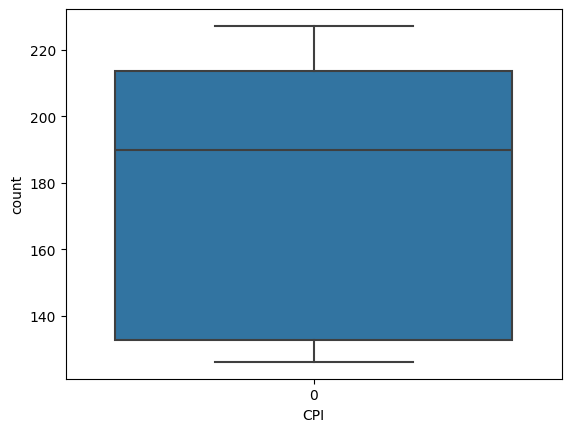

<IPython.core.display.Javascript object>

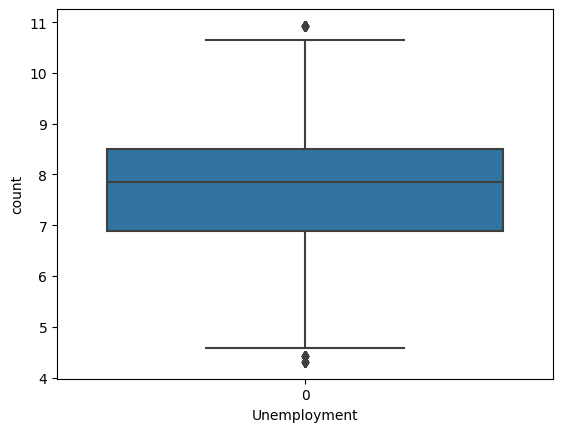

In [13]:
for col_name in col:
  if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
    sns.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

### Now we have completed the eda process for our data and now we can start with the visualization part

# Visualization

# Impact of Unemployment on Sales

In [14]:
df_su = df.groupby('Store')[["Unemployment","Weekly_Sales"]].sum().reset_index()
df_su = df_su.sort_values(by='Unemployment', ascending=False)
df_su

Store  Unemployment  Weekly_Sales
42     43      1420.677  9.056544e+07
33     34      1420.677  1.382498e+08
28     29      1402.313  7.714155e+07
17     18      1263.877  1.551147e+08
34     35      1256.766  1.315207e+08
44     45      1236.771  1.123953e+08
31     32      1227.760  1.668192e+08
6       7      1227.760  8.159828e+07
32     33      1220.241  3.716022e+07
23     24      1207.923  1.940160e+08
13     14      1202.076  2.761276e+08
41     42      1195.904  7.956575e+07
21     22      1153.920  1.470756e+08
9      10      1153.147  2.556789e+08
18     19      1143.464  2.066349e+08
14     15      1143.464  8.913368e+07
26     27      1136.229  2.507778e+08
25     26      1125.706  1.434164e+08
35     36      1125.274  5.341221e+07
38     39      1125.274  2.074455e+08
36     37      1125.274  7.420274e+07
20     21      1090.210  1.081179e+08
29     30      1090.210  6.271689e+07
30     31      1090.210  1.996139e+08
0       1      1088.290  2.224028e+08
1       2      1074.606  2.687221e+08
24     25      1054.112  1.010612e+08
2       3      1026.309  5.758674e+07
10     11      1026.309  1.939628e+08
19     20      1010.414  2.827759e+08
40     41       997.193  1.813419e+08
43     44       963.194  4.329309e+07
12     13       958.700  2.682025e+08
5       6       944.787  2.237561e+08
16     17       936.565  1.277821e+08
15     16       926.353  7.425243e+07
4       5       900.243  4.547569e+07
8       9       872.283  7.778922e+07
7       8       871.134  1.299512e+08
3       4       754.751  2.473888e+08
39     40       506.204  9.669790e+07
22     23       506.204  1.399826e+08
37     38       182.834  7.347379e+06
11     12       182.834  1.638671e+07
27     28       182.834  2.110677e+07

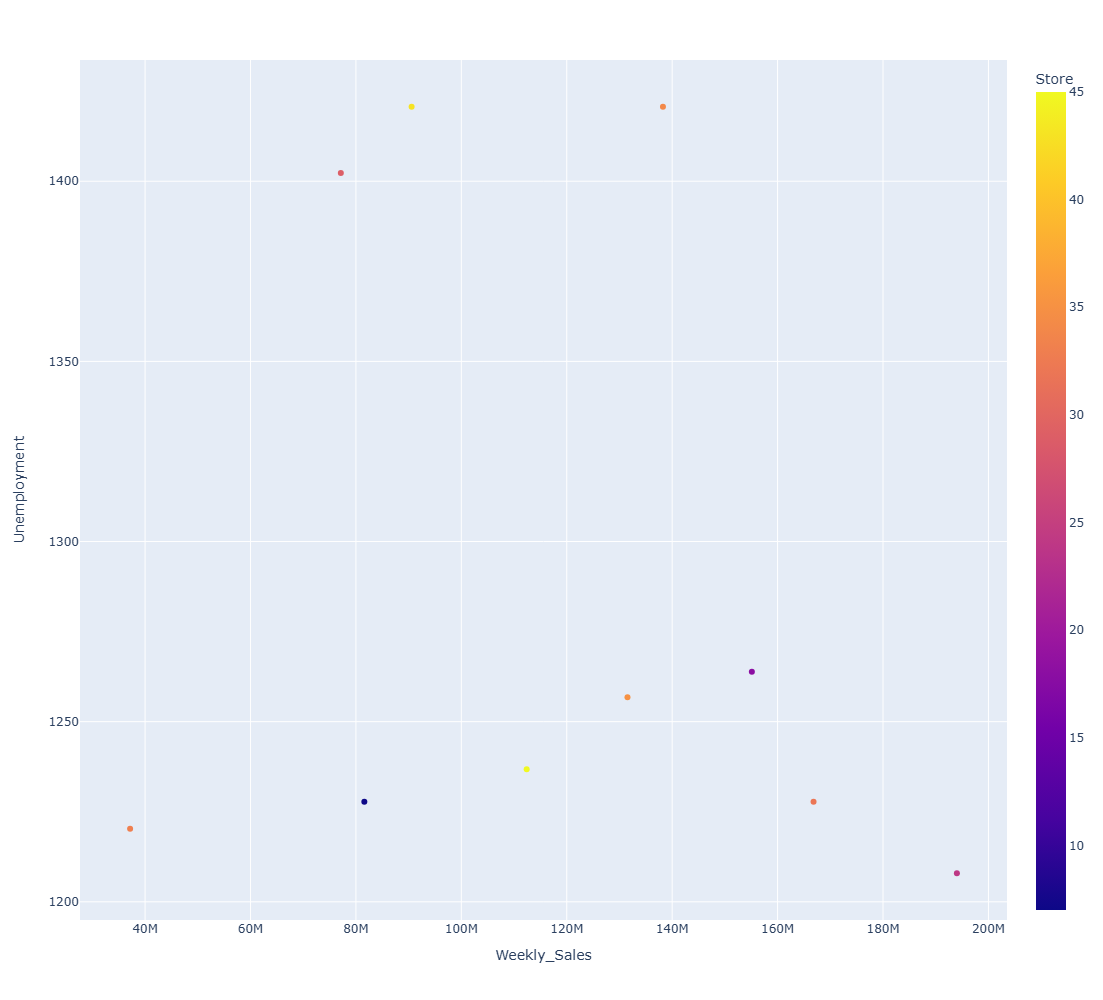

In [15]:
fig = px.scatter(df_su.head(10), x="Weekly_Sales", y="Unemployment", color = 'Store')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()

## From this we conclude: more the number of unemployment lesser the weekly sales of that store_id

# Impact of tempreture on sales 

In [17]:
df_ts = df.sort_values(by="Temperature" , ascending = False)
df_ts

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4599     33 2010-07-16     280937.84             0       100.14       2.971   
4707     33 2012-08-10     297753.49             0       100.07       3.811   
4657     33 2011-08-26     237095.82             0        99.66       3.663   
4658     33 2011-09-02     239198.36             0        99.20       3.798   
4649     33 2011-07-01     226702.36             0        98.43       3.842   
...     ...        ...           ...           ...          ...         ...   
5628     40 2011-01-28     775910.43             0         9.51       3.243   
959       7 2012-01-13     593875.46             0         7.46       3.077   
2336     17 2011-01-07    1083071.14             0         6.23       2.891   
3626     26 2011-01-28     817485.14             0         5.54       3.243   
910       7 2011-02-04     558027.77             0        -2.06       3.011   

             CPI  Unemployment  
4599  126.149806         9.495  
4707  130.756161         7.147  
4657  129.283258         8.442  
4658  129.325936         8.442  
4649  129.089400         8.442  
...          ...           ...  
5628  133.105968         5.114  
959   196.733052         8.256  
2336  127.191774         6.866  
3626  133.105968         7.907  
910   191.762589         8.818  

[5925 rows x 8 columns]

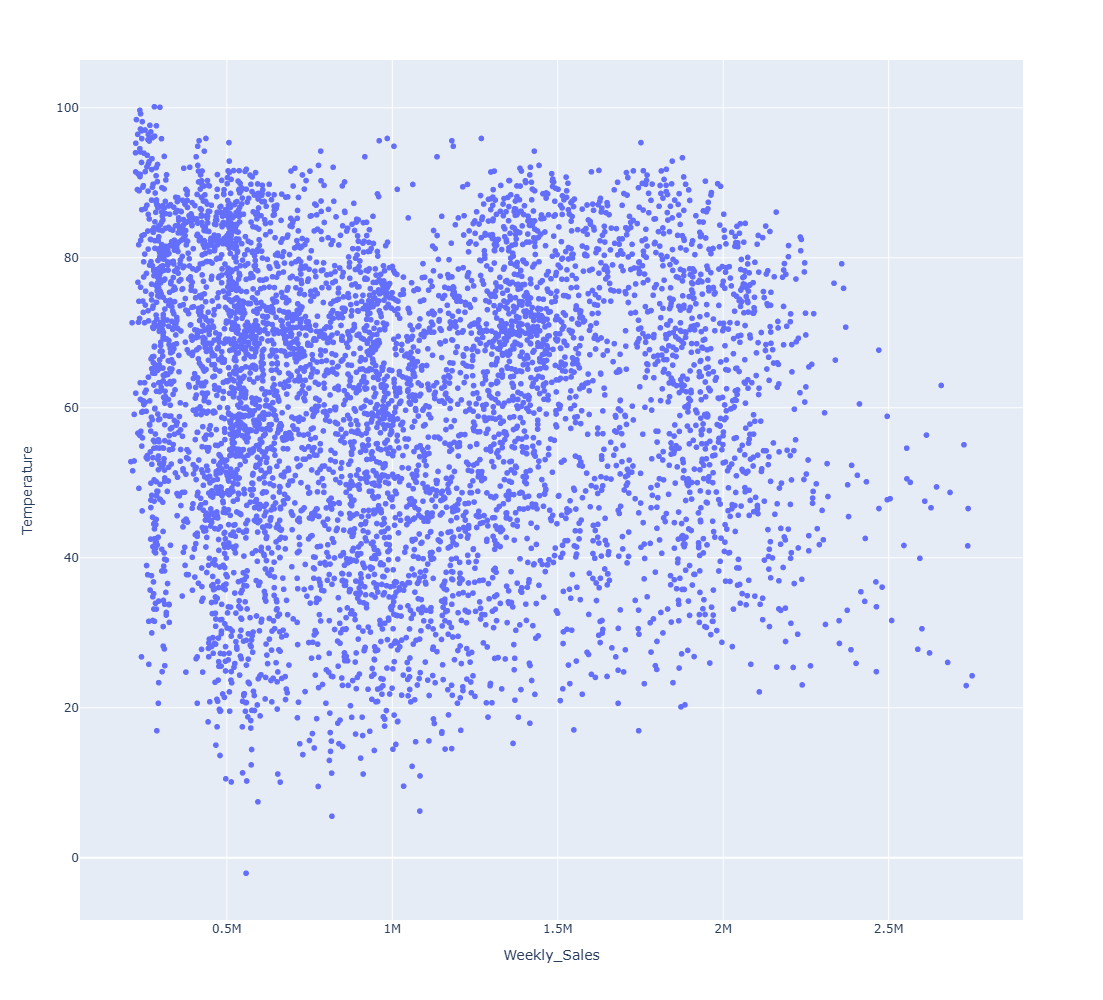

In [18]:
fig = px.scatter(df_ts, x="Weekly_Sales", y="Temperature")
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()

## From this we conclude : more the temperature lesser is the weekly sales.

# Impact of CPI on sales 

In [19]:
df_cpi = df.sort_values(by="CPI", ascending = False)
df_cpis=  df_cpi.groupby('Store').agg({'CPI': 'mean', 'Weekly_Sales': 'sum'}).reset_index()
df_cpis = df_cpis.sort_values(by="CPI", ascending = False)
df_cpis

Store         CPI  Weekly_Sales
8       9  219.626689  7.778922e+07
7       8  219.439026  1.299512e+08
2       3  219.391531  5.758674e+07
10     11  219.391531  1.939628e+08
5       6  217.553197  2.237561e+08
4       5  216.565581  4.547569e+07
0       1  215.996892  2.224028e+08
1       2  215.655023  2.687221e+08
20     21  215.646311  1.081179e+08
29     30  215.646311  6.271689e+07
30     31  215.646311  1.996139e+08
35     36  214.729069  5.341221e+07
38     39  214.729069  2.074455e+08
36     37  214.729069  7.420274e+07
19     20  209.069373  2.827759e+08
24     25  209.038131  1.010612e+08
42     43  207.735162  9.056544e+07
15     16  193.664243  7.425243e+07
31     32  193.664243  1.668192e+08
40     41  193.664243  1.813419e+08
6       7  193.664243  8.159828e+07
13     14  186.345873  2.761276e+08
44     45  186.285678  1.123953e+08
26     27  139.028284  2.507778e+08
34     35  139.011284  1.315207e+08
21     22  139.011284  1.470756e+08
18     19  135.092607  2.066349e+08
14     15  135.092607  8.913368e+07
17     18  135.092607  1.551147e+08
23     24  135.092607  1.940160e+08
28     29  135.092607  7.714155e+07
25     26  135.092607  1.434164e+08
39     40  133.858021  9.669790e+07
22     23  133.858021  1.399826e+08
27     28  130.901331  2.110677e+07
37     38  130.901331  7.347379e+06
11     12  130.901331  1.638671e+07
9      10  128.701735  2.556789e+08
12     13  128.693003  2.682025e+08
16     17  128.679669  1.277821e+08
32     33  128.679669  3.716022e+07
33     34  128.679669  1.382498e+08
41     42  128.679669  7.956575e+07
43     44  128.679669  4.329309e+07
3       4  128.367754  2.473888e+08

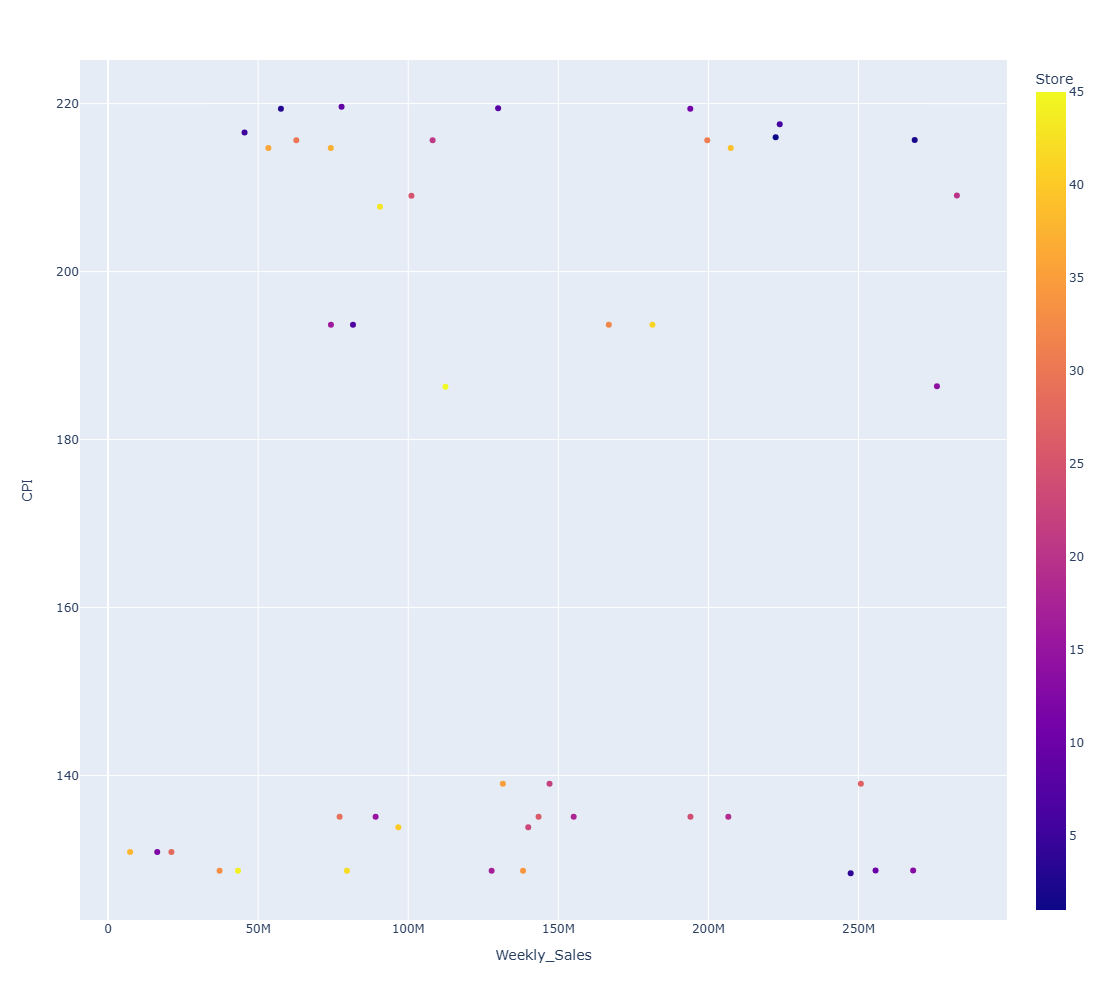

In [20]:
fig = px.scatter(df_cpis, x="Weekly_Sales", y="CPI", color='Store')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)
fig.show()

## From this we conclude:

# Top performing stores according to the historical data.

In [21]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
store_sales = store_sales.reset_index()

In [22]:
top_stores = store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
top_stores = top_stores.reset_index()
top_stores

index  Store  Weekly_Sales
0     19     20  2.827759e+08
1     13     14  2.761276e+08
2      1      2  2.687221e+08
3     12     13  2.682025e+08
4      9     10  2.556789e+08
5     26     27  2.507778e+08
6      3      4  2.473888e+08
7      5      6  2.237561e+08
8      0      1  2.224028e+08
9     38     39  2.074455e+08

In [23]:
top_stores.columns

Index(['index', 'Store', 'Weekly_Sales'], dtype='object')

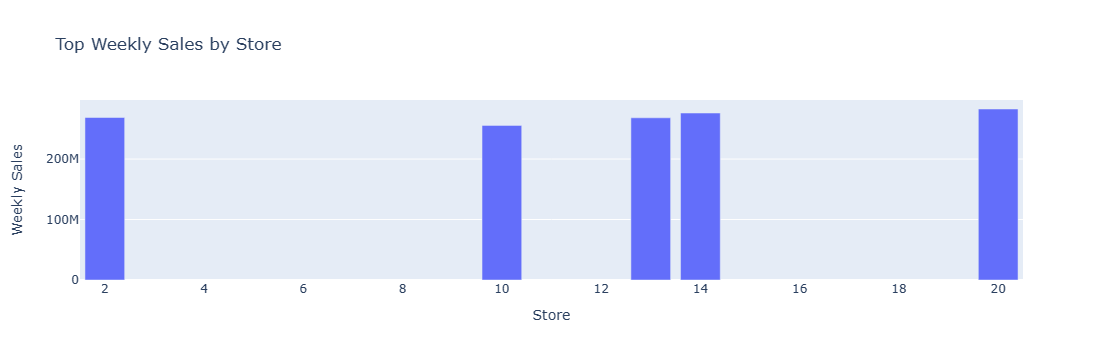

In [24]:
fig = px.bar(top_stores.head(5), x='Store', y='Weekly_Sales', 
             title='Top Weekly Sales by Store',
             labels={'Store': 'Store', 'Weekly_Sales': 'Weekly Sales'})
fig.show()

## From this we conclude: store 2,10,13,14,20 are the top 5 stores that are top performing on the bases of sales

# The worst performing store
##Significant difference between highest and lowest performing stores.

In [25]:
bottom_stores = store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
bottom_stores = bottom_stores.reset_index()
bottom_stores

index  Store  Weekly_Sales
0     37     38    7347378.89
1     11     12   16386710.79
2     27     28   21106767.80
3     32     33   37160221.96
4     43     44   43293087.84
5      4      5   45475688.90
6     35     36   53412214.97
7      2      3   57586735.07
8     29     30   62716885.12
9     36     37   74202740.32

In [26]:
bottom_stores.drop('index' , axis=1)

Store  Weekly_Sales
0     38    7347378.89
1     12   16386710.79
2     28   21106767.80
3     33   37160221.96
4     44   43293087.84
5      5   45475688.90
6     36   53412214.97
7      3   57586735.07
8     30   62716885.12
9     37   74202740.32

## Store number 38 is the worst performing store 

In [27]:
df_sorted = store_sales.sort_values(by='Weekly_Sales',ascending=False)
df_sorted

Store  Weekly_Sales
19     20  2.827759e+08
13     14  2.761276e+08
1       2  2.687221e+08
12     13  2.682025e+08
9      10  2.556789e+08
26     27  2.507778e+08
3       4  2.473888e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
23     24  1.940160e+08
10     11  1.939628e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
25     26  1.434164e+08
22     23  1.399826e+08
33     34  1.382498e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
39     40  9.669790e+07
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
35     36  5.341221e+07
4       5  4.547569e+07
43     44  4.329309e+07
32     33  3.716022e+07
27     28  2.110677e+07
11     12  1.638671e+07
37     38  7.347379e+06

In [28]:
N = 5 
top_5 = df_sorted.head(N)
bottom_5 = df_sorted.tail(N)

## Top 5 weekly sales by store

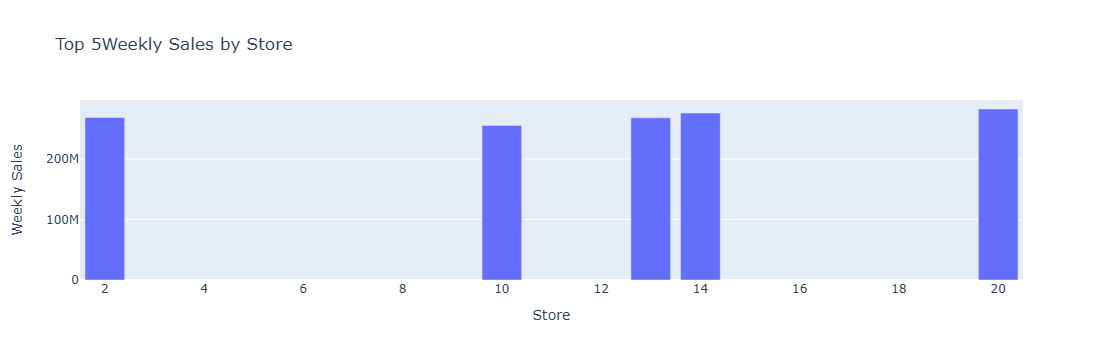

In [30]:
fig = px.bar(top_5, x='Store', y='Weekly_Sales', 
             title='Top 5Weekly Sales by Store',
             labels={'Store': 'Store', 'Weekly_Sales': 'Weekly Sales'})
fig.show()

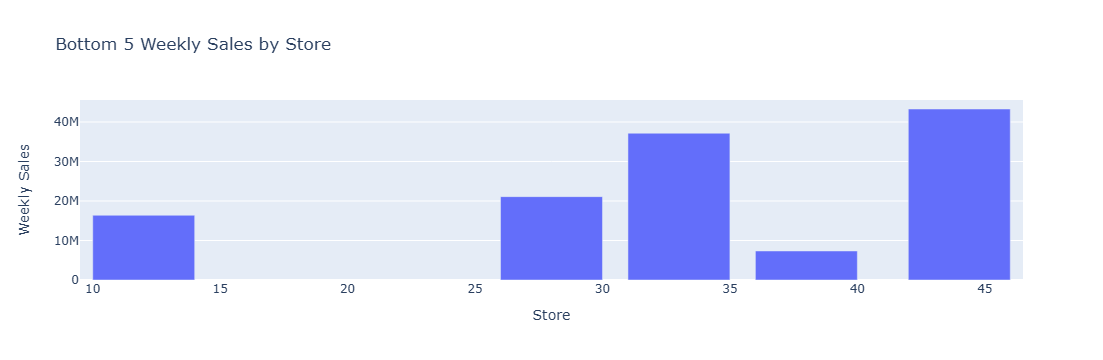

In [31]:
fig = px.bar(bottom_5, x='Store', y='Weekly_Sales', 
             title='Bottom 5 Weekly Sales by Store',
             labels={'Store': 'Store', 'Weekly_Sales': 'Weekly Sales'})
fig.show()

## THE BELOW CODE GIVES US THE OPTION TO CHOOSE THE STORE FOR WHICH WE FORECAST.

In [32]:
df_exp = df.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 1


Weekly_Sales    float64
dtype: object

In [33]:
sales.tail()

Weekly_Sales
Date                    
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


## Conversion of non-stationary data into a stationary is done by the removal of noise from time series data

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [37]:
adfuller_test(sales['Weekly_Sales'])

ADF Test Statistic : -5.102186145192289
p-value : 1.3877788330759307e-05
#Lags Used : 4
Number of Observations Used : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

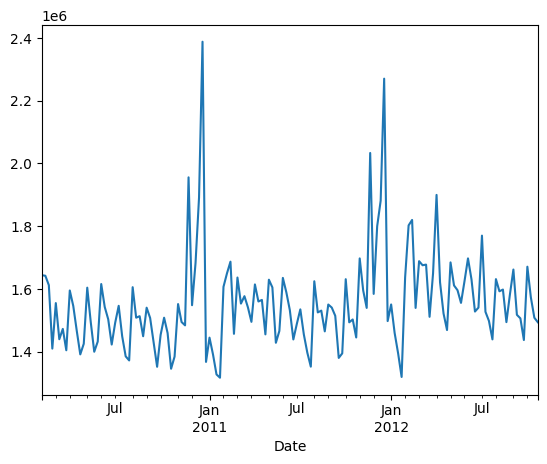

In [38]:
sales['Weekly_Sales'].plot()

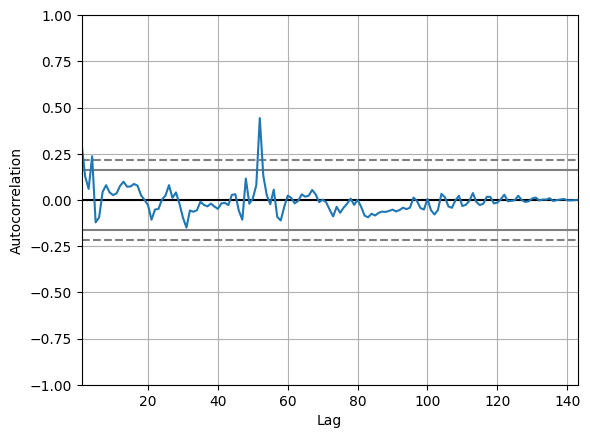

In [39]:
pd.plotting.autocorrelation_plot(sales['Weekly_Sales'])
plt.show()


In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

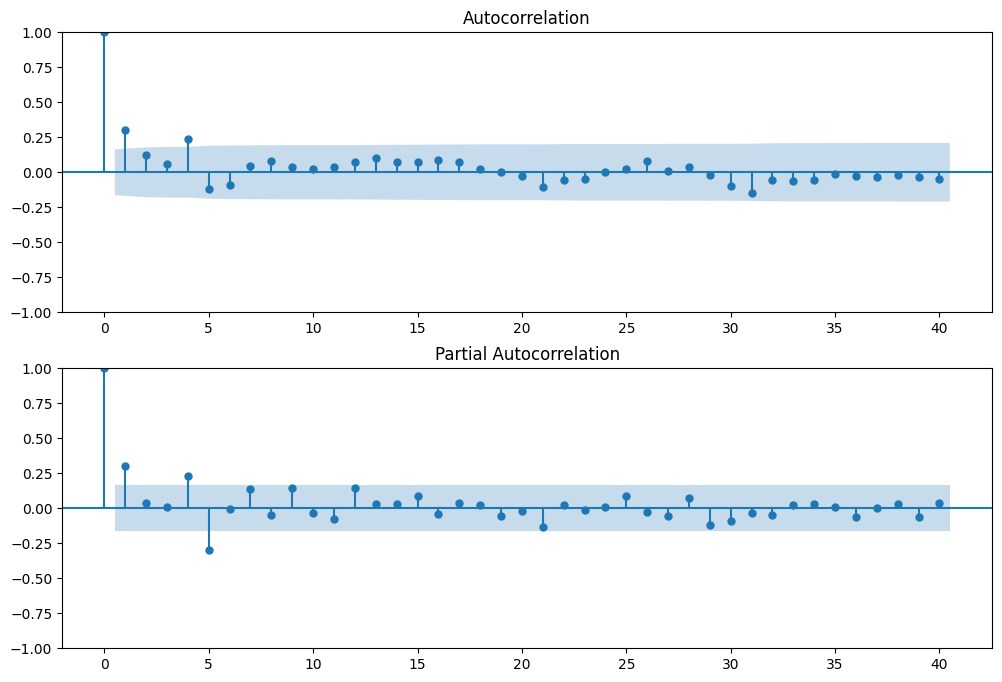

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales['Weekly_Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales['Weekly_Sales'],lags=40,ax=ax2)

In [42]:
sales

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]

## p = 1 , d = 0 , q = 5

In [43]:
train=sales.iloc[:119]['Weekly_Sales']
test=sales.iloc[120:]['Weekly_Sales']

# Training model - ARIMA

In [44]:
from statsmodels.tsa.arima.model import ARIMA


model=ARIMA(train,order=(1,0,5))
model=model.fit()

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

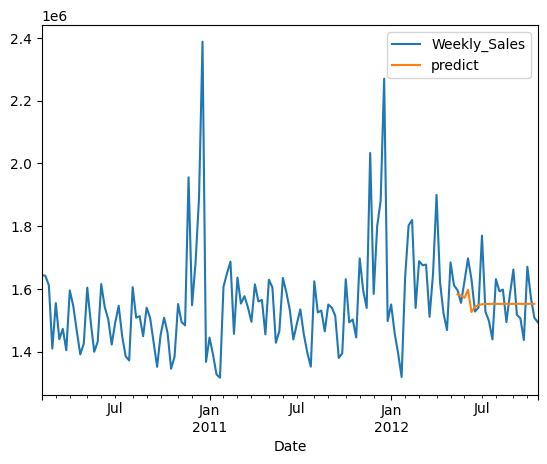

In [45]:
sales['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
sales[['Weekly_Sales','predict']].plot()

## Predicting the projections for the next few weeks

<Axes: xlabel='Date'>

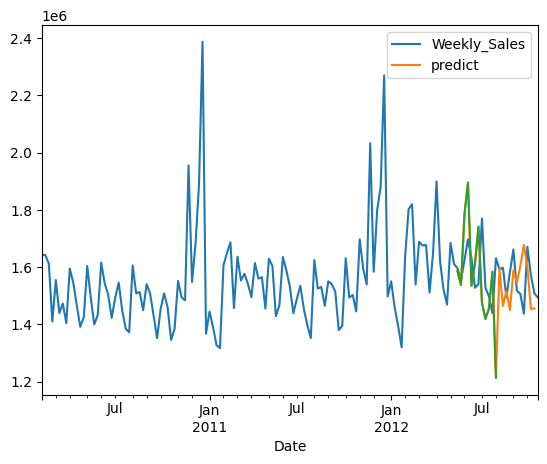

In [52]:
forecast=model.forecast(steps=12)
sales.plot()
forecast.plot()

# Training model - SARIMAX

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,0,5),seasonal_order=(1,0,5,12))
model=model.fit()

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\rudra\anaconda3\Lib\site-p

<Axes: xlabel='Date'>

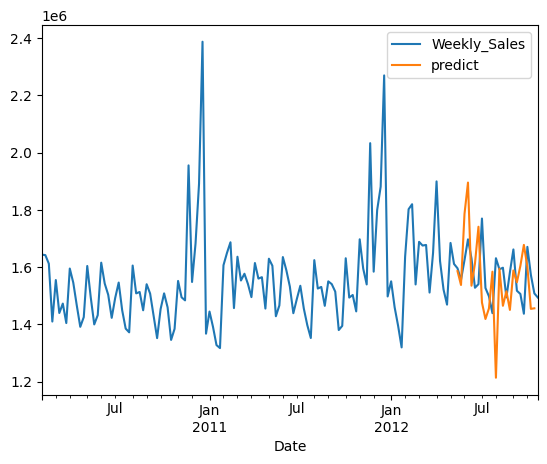

In [56]:
sales['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
sales[['Weekly_Sales','predict']].plot()

## Predicting the projections for the next few weeks

<Axes: xlabel='Date'>

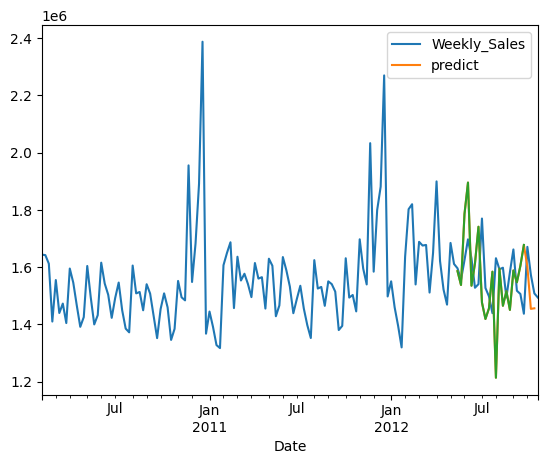

In [57]:
forecast=model.forecast(steps=20)
sales.plot()
forecast.plot()